In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
dataset.shape


(2035, 8)

In [6]:
dataset.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
dataset['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

<AxesSubplot:>

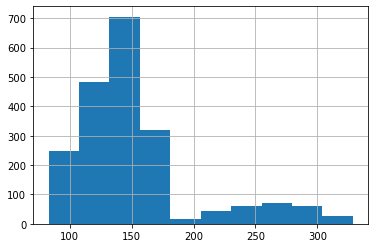

In [8]:
dataset['High'].hist()


<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

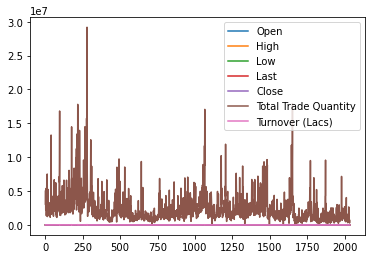

In [9]:
plt.figure(figsize=(20,8))
dataset.plot()

In [10]:
import math

In [11]:
data=dataset.filter(['Close'])
data_set=dataset.values
training_data_len=math.ceil(len(dataset)*8)
training_data_len

16280

In [12]:
data_set

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [13]:
dataset=dataset.iloc[:, 0:5]
data_set

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [14]:
training_set=dataset.iloc[:, 1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

data_training_scaled=scaler.fit_transform(training_set)

In [16]:
features_set=[]
labels=[]
for i in range(60,586):
    features_set.append(data_training_scaled[i-60:i,0])
    labels.append(data_training_scaled[i,0])

In [17]:
features_set, labels=np.array(features_set),np.array(labels)

In [18]:
features_set=np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))
features_set.shape

(526, 60, 1)

In [19]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [20]:
model=Sequential()

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(features_set,labels,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/50
27/27 [==============================

In [23]:
data_testing_complete = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data_testing_processed = data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [24]:
data_total = pd.concat((dataset['Open'],dataset['Open']),axis=0)

In [25]:
test_inputs=data_total[len(data_total)-len(dataset)-60:].values
test_inputs.shape

(2095,)

In [26]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scaler.transform(test_inputs)

In [27]:
test_features=[]
for i in range(60,89):
    test_features.append(test_inputs[i-60:i,0])

In [28]:
test_features=np.array(test_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))

In [29]:
test_features.shape

(29, 60, 1)

In [30]:
predictions=model.predict(test_features)

In [31]:
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

In [32]:
x_train=dataset[0:1256]
y_train=dataset[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [33]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [34]:
np.random.seed(1)
np.random.randn(3,3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [35]:
np.random.normal(1)

0.7506296245225899

In [36]:
np.random.normal(5)

6.4621079370449745

In [37]:
np.random.normal(42)
np.random.normal(size=1000,scale=100).std()

97.83610873981759

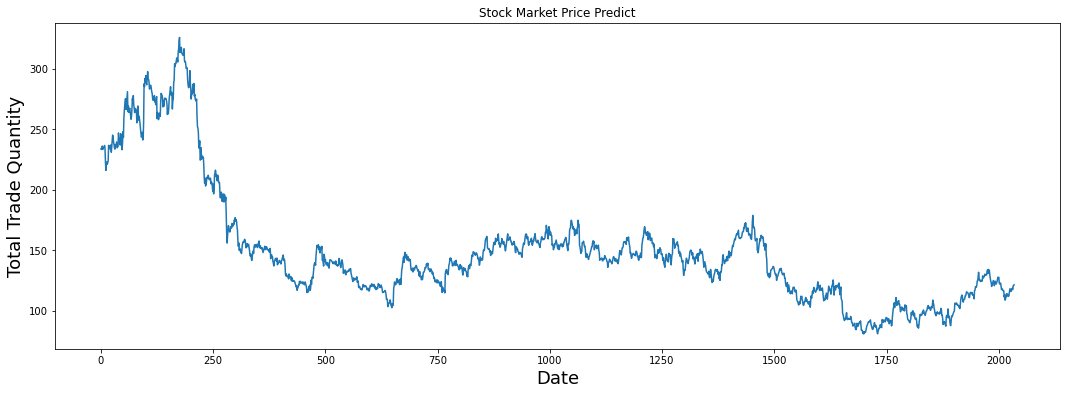

In [38]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Predict")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

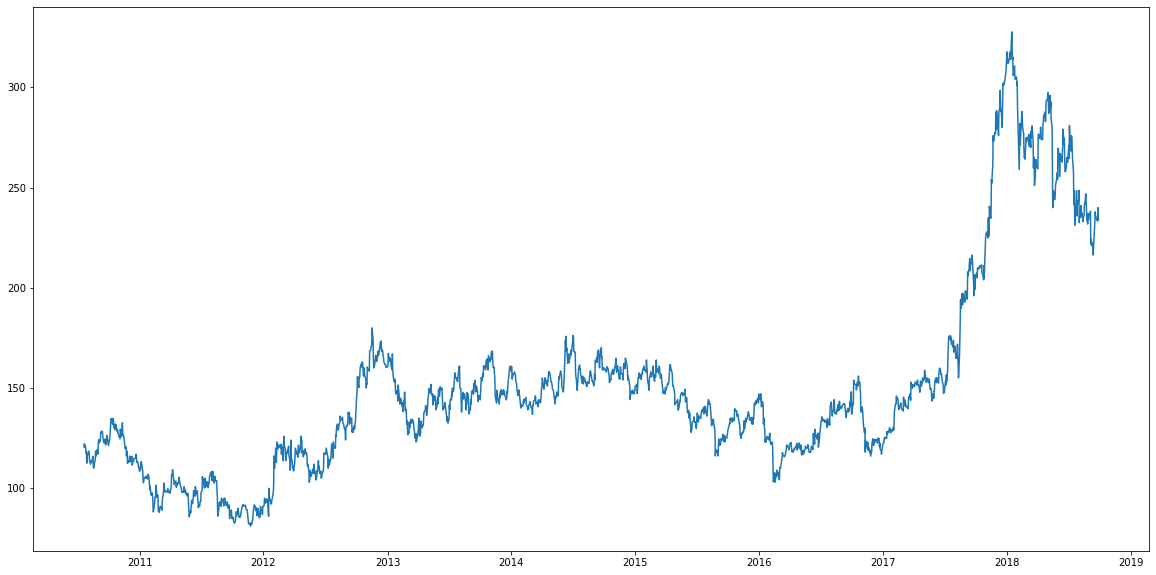

In [39]:
dataset['Date']=pd.to_datetime(dataset.Date)
dataset.index=dataset['Date']
plt.figure(figsize=(20,10))
plt.plot(dataset['Open'],label='Close Price Hist')

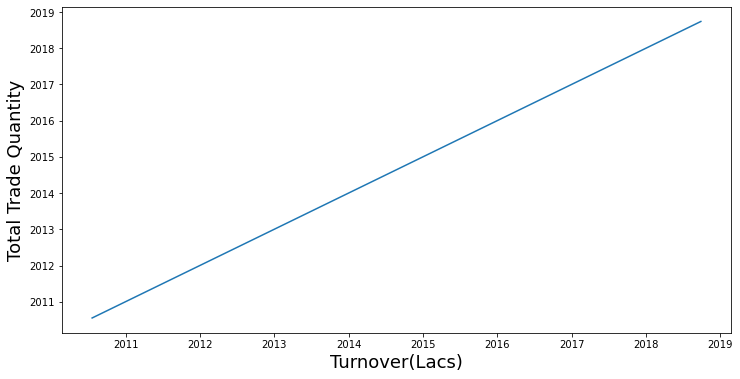

In [40]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Date'])
plt.xlabel('Turnover(Lacs)',fontsize=18)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

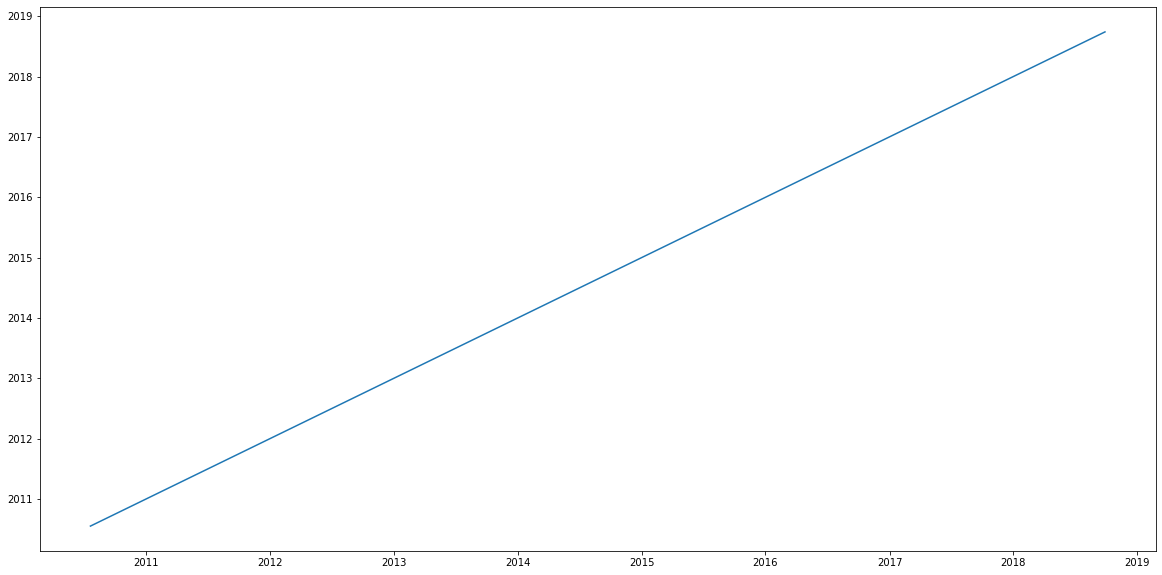

In [41]:
dataset['Turnover (Lacs)']=pd.to_datetime(dataset.Date)
dataset.index=dataset['Turnover (Lacs)']
plt.figure(figsize=(20,10))
plt.plot(dataset['Turnover (Lacs)'],label='Close Price Hist')